# Make Trained Model

In [1]:
from torchvision.models import resnet18
from torch import nn
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
model = resnet18(pretrained = True)
# model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

normalize = transforms.Normalize(mean=[0.1306, 0.1306, 0.1306],
                                 std=[0.3081, 0.3081, 0.3081])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: torch.cat([x, x, x], 0)),    
    normalize
])

transform_train = transforms.Compose([
    #transforms.ToPILImage(),
    transforms.RandomRotation(5),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: torch.cat([x, x, x], 0)),    
    normalize
])    

train_ds = MNIST("mnist", train=True, download=True, transform=transform_train)
test_ds = MNIST("mnist", train=False, download=True, transform=transform_test)

train_dl = DataLoader(train_ds, batch_size=64, shuffle=True)


/opt/conda/envs/cuda_11_6/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/conda/envs/cuda_11_6/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/opt/conda/envs/cuda_11_6/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [2]:
model.fc = nn.Linear(512, 10)
device = 'cuda'

In [3]:
import utils
import torch.optim as optim
from tqdm import tqdm
import torch

model = model.to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4) # 
train_scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[6, 12, 18], gamma=0.2) #learning rate decay
criterion_CE = nn.CrossEntropyLoss()


In [4]:
for epoch in range(200):
    print(f"lr : {train_scheduler.get_last_lr()}")

    for img, label in tqdm(train_dl):
        img = img.to(device)
        label = label.to(device)
        
        optimizer.zero_grad()
        pred = model(img)
        loss = criterion_CE(pred, label)
        loss.backward()
        optimizer.step()
    train_scheduler.step(epoch)
        
    utils.test(model, test_dl,device)

lr : [0.1]


100%|██████████| 938/938 [00:36<00:00, 25.57it/s]
/opt/conda/envs/cuda_11_6/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)
100%|██████████| 157/157 [00:03<00:00, 46.00it/s]


0 	 test acc : 0.9388999938964844
lr : [0.1]


100%|██████████| 157/157 [00:02<00:00, 55.14it/s]


0 	 test acc : 0.967199981212616
lr : [0.1]


100%|██████████| 157/157 [00:02<00:00, 55.42it/s]


0 	 test acc : 0.9706999659538269
lr : [0.1]


100%|██████████| 157/157 [00:02<00:00, 57.41it/s]


0 	 test acc : 0.9690999984741211
lr : [0.1]


100%|██████████| 157/157 [00:02<00:00, 57.08it/s]


0 	 test acc : 0.9727999567985535
lr : [0.1]


100%|██████████| 157/157 [00:02<00:00, 56.84it/s]


0 	 test acc : 0.973800003528595
lr : [0.1]


100%|██████████| 157/157 [00:02<00:00, 57.42it/s]


0 	 test acc : 0.9745999574661255
lr : [0.020000000000000004]


100%|██████████| 157/157 [00:02<00:00, 56.53it/s]


0 	 test acc : 0.9866999983787537
lr : [0.020000000000000004]


100%|██████████| 157/157 [00:02<00:00, 57.34it/s]


0 	 test acc : 0.9853999614715576
lr : [0.020000000000000004]


100%|██████████| 157/157 [00:02<00:00, 56.81it/s]


0 	 test acc : 0.9860000014305115
lr : [0.020000000000000004]


100%|██████████| 157/157 [00:02<00:00, 57.00it/s]


0 	 test acc : 0.9857999682426453
lr : [0.020000000000000004]


100%|██████████| 157/157 [00:02<00:00, 56.76it/s]


0 	 test acc : 0.9868999719619751
lr : [0.020000000000000004]


100%|██████████| 157/157 [00:02<00:00, 56.93it/s]


0 	 test acc : 0.9815999865531921
lr : [0.004000000000000001]


100%|██████████| 157/157 [00:02<00:00, 55.13it/s]


0 	 test acc : 0.9883999824523926
lr : [0.004000000000000001]


100%|██████████| 157/157 [00:02<00:00, 57.82it/s]


0 	 test acc : 0.9892999529838562
lr : [0.004000000000000001]


100%|██████████| 157/157 [00:02<00:00, 57.36it/s]


0 	 test acc : 0.9888999462127686
lr : [0.004000000000000001]


100%|██████████| 157/157 [00:02<00:00, 57.23it/s]


0 	 test acc : 0.9883999824523926
lr : [0.004000000000000001]


100%|██████████| 157/157 [00:02<00:00, 57.20it/s]


0 	 test acc : 0.9893999695777893
lr : [0.004000000000000001]


100%|██████████| 157/157 [00:02<00:00, 57.07it/s]


0 	 test acc : 0.9889999628067017
lr : [0.0008000000000000003]


100%|██████████| 157/157 [00:02<00:00, 54.80it/s]


0 	 test acc : 0.9888999462127686
lr : [0.0008000000000000003]


100%|██████████| 157/157 [00:02<00:00, 57.33it/s]


0 	 test acc : 0.9896000027656555
lr : [0.0008000000000000003]


100%|██████████| 157/157 [00:02<00:00, 56.75it/s]


0 	 test acc : 0.9893999695777893
lr : [0.0008000000000000003]


100%|██████████| 157/157 [00:02<00:00, 57.63it/s]


0 	 test acc : 0.9889999628067017
lr : [0.0008000000000000003]


100%|██████████| 157/157 [00:02<00:00, 56.60it/s]


0 	 test acc : 0.9884999990463257
lr : [0.0008000000000000003]


100%|██████████| 157/157 [00:02<00:00, 57.36it/s]


0 	 test acc : 0.9890999794006348
lr : [0.0008000000000000003]


100%|██████████| 157/157 [00:02<00:00, 57.88it/s]


0 	 test acc : 0.9883999824523926
lr : [0.0008000000000000003]


100%|██████████| 157/157 [00:02<00:00, 56.98it/s]


0 	 test acc : 0.9887999892234802
lr : [0.0008000000000000003]


100%|██████████| 157/157 [00:02<00:00, 54.37it/s]


0 	 test acc : 0.988599956035614
lr : [0.0008000000000000003]


  2%|▏         | 18/938 [00:00<00:31, 29.26it/s]


KeyboardInterrupt: 

In [8]:
test_dl = DataLoader(test_ds, batch_size=2000)


In [26]:
for img, label in tqdm(test_dl):
    img = img.to(device)
    label = label.to(device)
    
    
    input_lrp = utils.get_LRP_img(img, label, model, criterion_CE, optimizer, mean=2000.0, std = 0.1, mult = 0.4).cuda()
    
    output_lrp = model(input_lrp)
    output = model(img)
    
    print(sum(label == torch.argmax(output, dim=1)))
    print(sum(label == torch.argmax(output_lrp, dim=1)))
    break

  0%|          | 0/5 [00:01<?, ?it/s]

tensor(1969, device='cuda:0')
tensor(1969, device='cuda:0')


In [10]:
output_lrp.shape

torch.Size([2000, 10])

In [11]:
from sklearn.decomposition import PCA


In [15]:
output_lrp = output_lrp.cpu().detach().numpy()
pca2=PCA(n_components=2)
pca2.fit(output_lrp)
pca2_lrp=pca2.transform(output_lrp)
pca2_lrp.shape

(2000, 2)

In [16]:
output = output.cpu().detach().numpy()
pca2=PCA(n_components=2)
pca2.fit(output)
pca2_org=pca2.transform(output)
pca2_org.shape

(2000, 2)

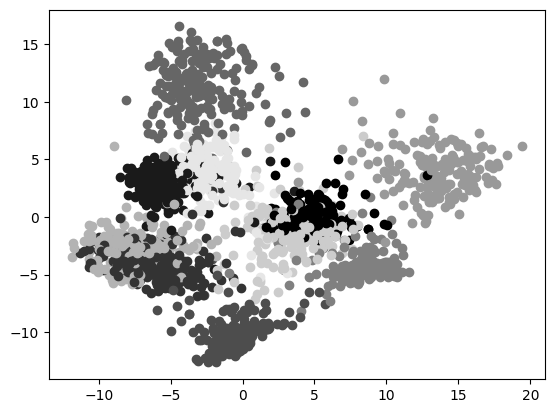

In [24]:
from matplotlib import pyplot as plt


for i, (x,y) in enumerate(pca2_lrp[:]):
    plt.scatter(x,y, color = str(label[i].item()/ 10))
plt.show()
    

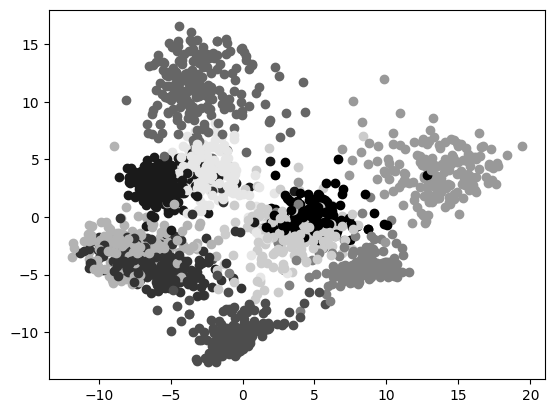

In [25]:
from matplotlib import pyplot as plt


for i, (x,y) in enumerate(pca2_org[:]):
    plt.scatter(x,y, color = str(label[i].item()/ 10))
plt.show()
    